In [365]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [366]:
df = pd.read_csv('first_batch_salad_data.csv')


In [367]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41.574135,39.967,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43.051105,40.083,2023-04-18 15:45:00.000000,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44.586642,40.167,2023-04-18 16:00:00.000000,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46.053279,40.133,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47.546052,48.117,2023-04-18 16:00:00.000000,55,0.0,25,14.0,4.0,1025.0


In [368]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   measurement_id         6043 non-null   int64  
 1   sensor                 6043 non-null   object 
 2   measured_at            6043 non-null   object 
 3   humdity                6043 non-null   float64
 4   weather_measured_at    6043 non-null   object 
 5   weather_himidity       6043 non-null   int64  
 6   weather_precipitation  6043 non-null   float64
 7   weather_cloud          6043 non-null   int64  
 8   weather_temperature    6043 non-null   float64
 9   weather_uv_index       6043 non-null   float64
 10  weather_pressure       6043 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 519.4+ KB


In [369]:
df.describe()


,measurement_id,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
count,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000
mean,3098.372828,53.219127,74.365547,0.195400,43.815820,12.571620,2.719345,1015.851398
std,1747.451966,19.618362,18.389203,0.588114,39.057042,4.374862,1.597955,6.096224
min,73.000000,24.760000,27.000000,0.000000,0.000000,-1.000000,1.000000,1000.000000
25%,1583.500000,38.033000,60.000000,0.000000,0.000000,10.000000,1.000000,1013.000000
50%,3101.000000,42.310000,76.000000,0.000000,37.000000,13.000000,3.000000,1016.000000
75%,4611.500000,70.155000,93.000000,0.100000,75.000000,15.000000,4.000000,1019.000000
max,6122.000000,89.600000,100.000000,4.900000,100.000000,23.000000,6.000000,1028.000000


In [370]:
df['measured_at'] = df['measured_at'].apply(lambda x: str(x).split('.')[0])
df['measured_at'] = pd.to_datetime(df['measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['weather_measured_at'] = df['weather_measured_at'].apply(lambda x: str(x).split('.')[0])
df['weather_measured_at'] = pd.to_datetime(df['weather_measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [371]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measurement_id         6043 non-null   int64         
 1   sensor                 6043 non-null   object        
 2   measured_at            6043 non-null   datetime64[ns]
 3   humdity                6043 non-null   float64       
 4   weather_measured_at    6043 non-null   datetime64[ns]
 5   weather_himidity       6043 non-null   int64         
 6   weather_precipitation  6043 non-null   float64       
 7   weather_cloud          6043 non-null   int64         
 8   weather_temperature    6043 non-null   float64       
 9   weather_uv_index       6043 non-null   float64       
 10  weather_pressure       6043 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 519.4+ KB


In [372]:
df.head()


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,73,MAIN,2023-04-18 15:53:41,39.967,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
1,74,MAIN,2023-04-18 15:58:43,40.083,2023-04-18 15:45:00,55,0.0,25,14.0,3.0,1025.0
2,75,MAIN,2023-04-18 16:03:44,40.167,2023-04-18 16:00:00,55,0.0,0,14.0,4.0,1025.0
3,76,MAIN,2023-04-18 16:08:46,40.133,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0
4,77,MAIN,2023-04-18 16:13:47,48.117,2023-04-18 16:00:00,55,0.0,25,14.0,4.0,1025.0


In [373]:
df[df.isna().any(axis=1)]


,measurement_id,sensor,measured_at,humdity,weather_measured_at,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure


In [374]:
df.drop(columns=["weather_measured_at", "measurement_id"], inplace=True)

In [375]:
df['humidity_change'] = df['humdity'].pct_change()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

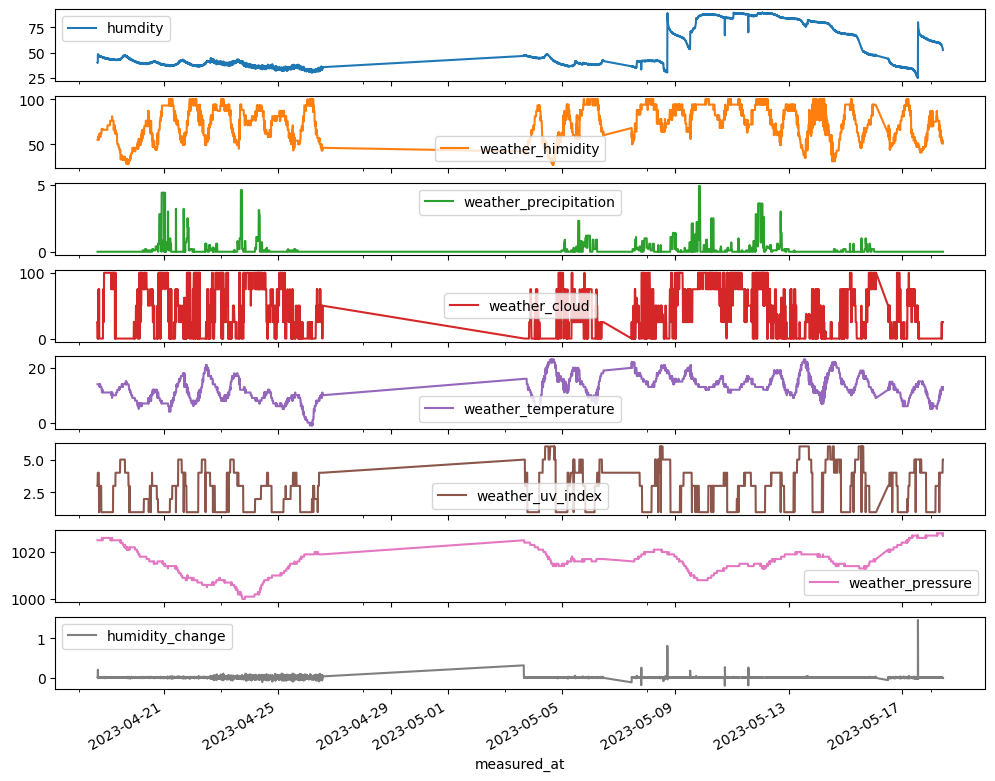

In [376]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [377]:
df = df.groupby(pd.Grouper(key='measured_at', freq='15min')).mean(numeric_only=True)
df.reset_index(inplace=True)


In [378]:
# Print df where humidity_change is is greater than 0.1 AND weather_precipitation is less than 0.1
df[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0)]


,measured_at,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
1441,2023-05-03 16:00:00,47.050000,42.0,0.0,0.0,16.0,5.0,1025.0,0.106659
1926,2023-05-08 17:15:00,42.545000,73.0,0.0,0.0,19.0,5.0,1019.0,0.395020
1927,2023-05-08 17:30:00,85.356667,73.0,0.0,0.0,19.0,5.0,1019.0,0.183218
2773,2023-05-17 13:00:00,36.956667,47.0,0.0,25.0,13.0,5.0,1027.0,0.484577


In [379]:
# Set humidity_change to 0 where humidity_change is greater than 0.1 AND weather_precipitation is less than 0.1
df.loc[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), 'humidity_change'] = 0
# df.loc[(df['humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), 'humidity_change'] = df['humidity_change'].mean()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

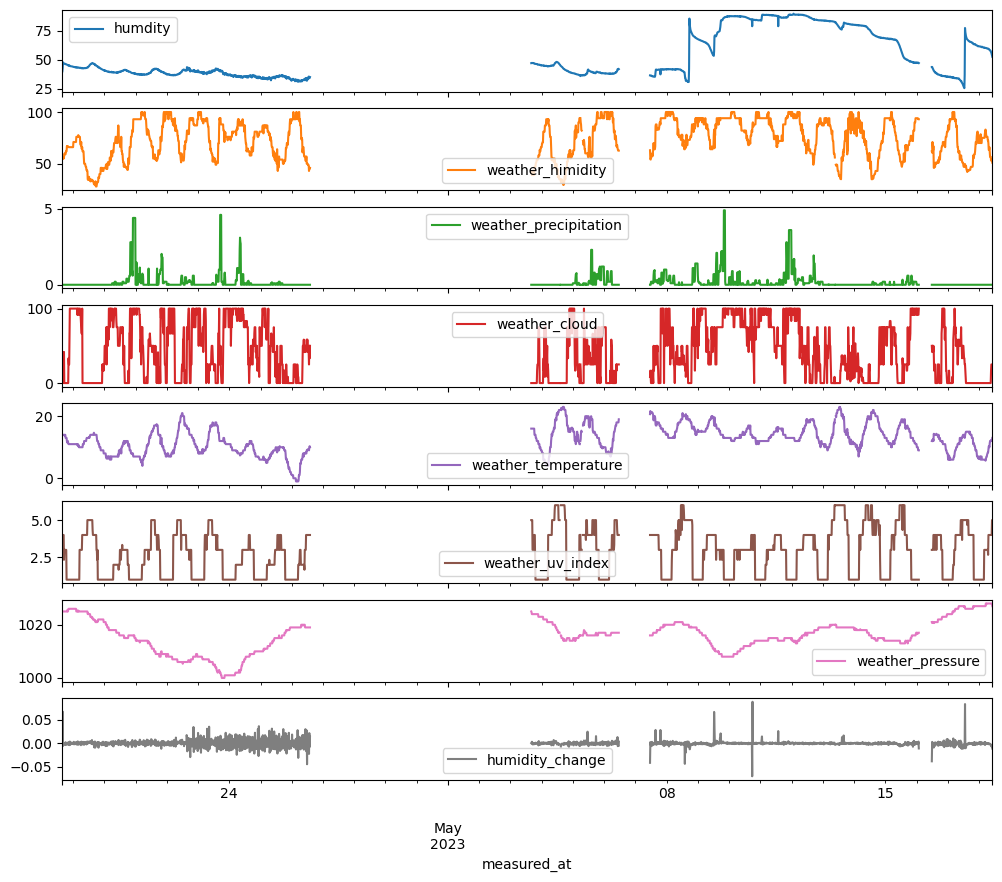

In [380]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [381]:
start_period = dt.strptime("2023-05-08 20:00:00", '%Y-%m-%d %H:%M:%S')
end_period = dt.strptime("2023-05-17 12:00:00", '%Y-%m-%d %H:%M:%S')
df = df[(df['measured_at'] > start_period) &  (df['measured_at'] < end_period)]

array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

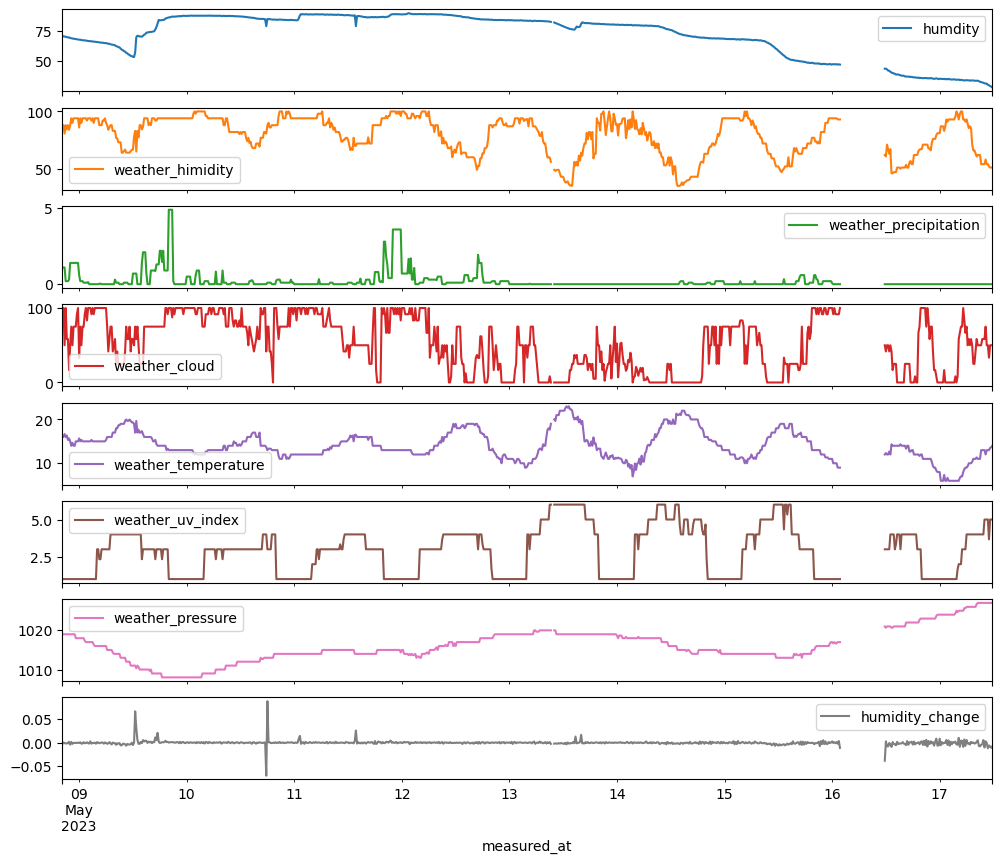

In [382]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


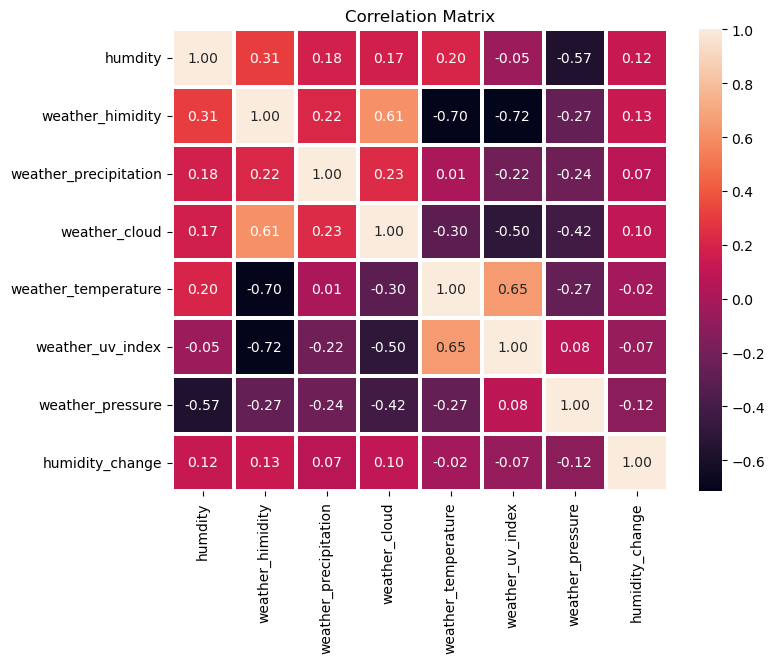

In [383]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [384]:
df.describe()

,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,72.234719,78.907806,0.216730,51.589662,14.087004,2.891561,1016.019409,-0.000363
std,17.544244,16.671080,0.606093,36.101369,3.285795,1.617108,4.175008,0.005687
min,28.176667,35.000000,0.000000,0.000000,6.000000,1.000000,1008.000000,-0.069902
25%,65.755833,67.000000,0.000000,20.000000,12.000000,1.000000,1014.000000,-0.001486
50%,79.833333,83.166667,0.000000,50.000000,13.800000,3.000000,1015.000000,-0.000359
75%,86.310000,94.000000,0.100000,83.333333,16.000000,4.000000,1019.000000,0.000596
max,89.530000,100.000000,4.900000,100.000000,23.000000,6.000000,1027.000000,0.087506


In [385]:
thresh = 0.05
df[(df["humidity_change"] < -thresh) | (df["humidity_change"] > thresh)]

,measured_at,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
2003,2023-05-09 12:30:00,57.296667,83.000000,0.7,75.000000,17.000000,4.0,1011.0,0.066042
2120,2023-05-10 17:45:00,78.770000,80.666667,0.0,41.666667,13.666667,4.0,1013.0,-0.069902
2121,2023-05-10 18:00:00,84.666667,88.000000,0.1,75.000000,13.000000,3.0,1013.0,0.087506


In [386]:
df.loc[(df["humidity_change"] < -thresh) | (df["humidity_change"] > thresh), "humidity_change"] = 0

In [387]:
df.describe()

,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,72.234719,78.907806,0.216730,51.589662,14.087004,2.891561,1016.019409,-0.000469
std,17.544244,16.671080,0.606093,36.101369,3.285795,1.617108,4.175008,0.003290
min,28.176667,35.000000,0.000000,0.000000,6.000000,1.000000,1008.000000,-0.038279
25%,65.755833,67.000000,0.000000,20.000000,12.000000,1.000000,1014.000000,-0.001483
50%,79.833333,83.166667,0.000000,50.000000,13.800000,3.000000,1015.000000,-0.000353
75%,86.310000,94.000000,0.100000,83.333333,16.000000,4.000000,1019.000000,0.000584
max,89.530000,100.000000,4.900000,100.000000,23.000000,6.000000,1027.000000,0.030587


In [388]:
hourly = df.groupby(pd.Grouper(key='measured_at', freq='H')).mean(numeric_only=True)

hourly.reset_index(inplace=True)

In [389]:
hourly.info()
hourly.describe()
hourly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measured_at            208 non-null    datetime64[ns]
 1   humdity                199 non-null    float64       
 2   weather_himidity       199 non-null    float64       
 3   weather_precipitation  199 non-null    float64       
 4   weather_cloud          199 non-null    float64       
 5   weather_temperature    199 non-null    float64       
 6   weather_uv_index       199 non-null    float64       
 7   weather_pressure       199 non-null    float64       
 8   humidity_change        199 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 14.8 KB


,measured_at,humdity,weather_himidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,humidity_change
0,2023-05-08 20:00:00,70.456667,85.555556,1.100,75.000000,16.222222,1.0,1019.00,-0.001332
1,2023-05-08 21:00:00,69.705000,86.083333,0.225,58.333333,15.833333,1.0,1019.00,-0.000807
2,2023-05-08 22:00:00,68.734167,91.500000,1.400,62.500000,14.416667,1.0,1019.00,-0.001502
3,2023-05-08 23:00:00,68.086667,94.000000,1.400,85.416667,14.750000,1.0,1018.25,-0.000512
4,2023-05-09 00:00:00,67.455000,91.000000,0.300,58.333333,15.250000,1.0,1018.00,-0.001103


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

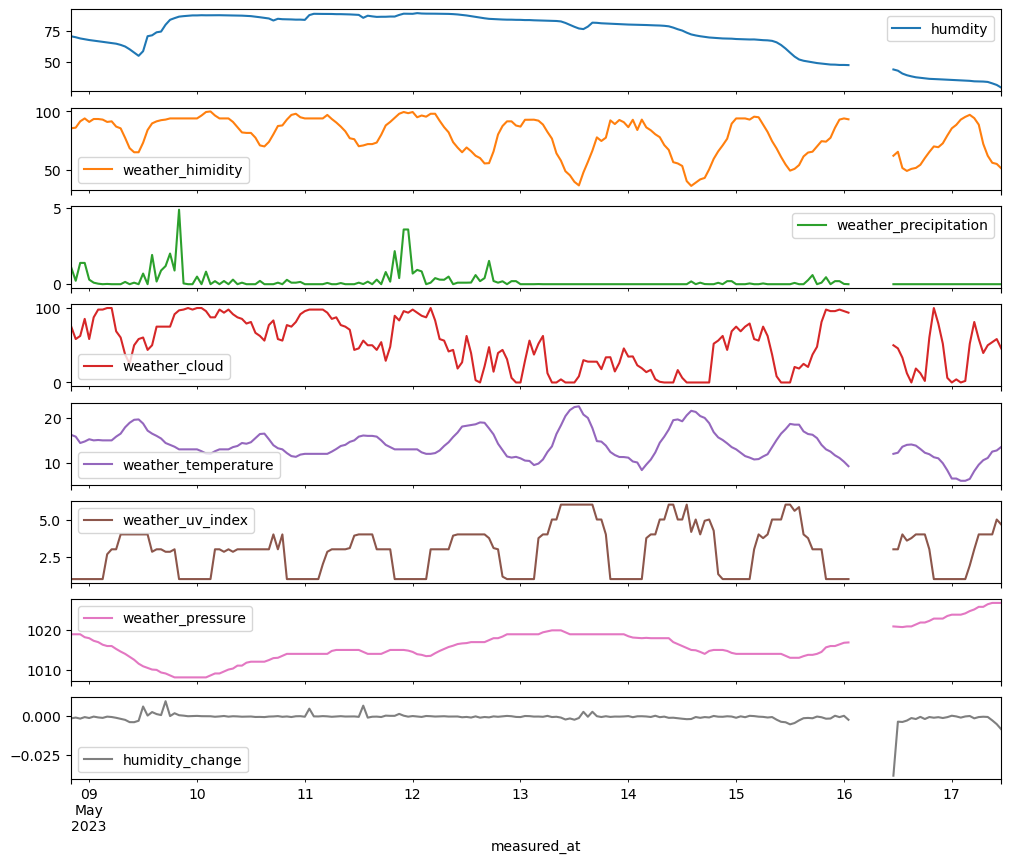

In [390]:
hourly.plot(x='measured_at', subplots=True, figsize=(12, 10))

In [391]:
# Get the mean and standard deviation of the humidity_change column
mean, std = hourly['humidity_change'].mean(), hourly['humidity_change'].std()

# Set the threshold to be 2 standard deviations away from the mean
thresh = 4 * std

hourly[(hourly["humidity_change"] < mean - thresh) | (hourly["humidity_change"] > mean + thresh)]
# Remove any rows in df where humidity_change is greater than 2 standard deviations away from the mean
hourly.loc[(hourly["humidity_change"] < -thresh) | (hourly["humidity_change"] > thresh), "humidity_change"] = 0



array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

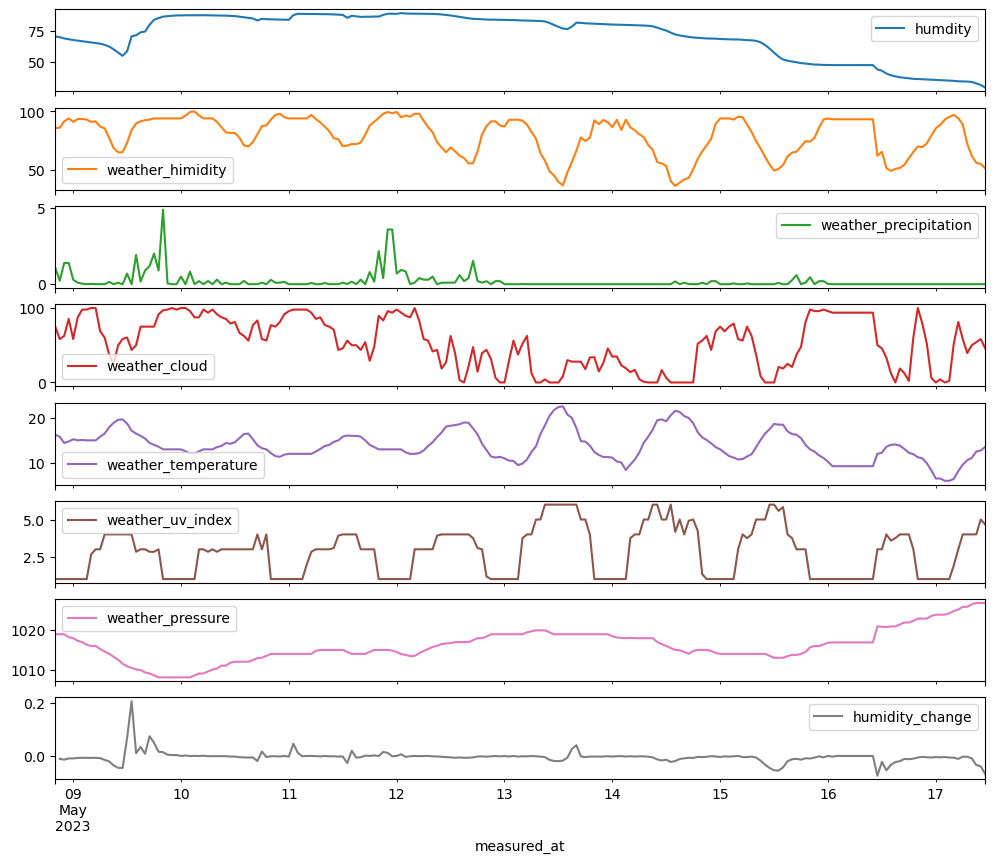

In [398]:
hourly['humidity_change'] = hourly['humdity'].pct_change()

# hourly.set_index('measured_at', inplace=True)
hourly.fillna(method='ffill', inplace=True)
# hourly.reset_index(inplace=True)

hourly.plot(x='measured_at', subplots=True, figsize=(12, 10))


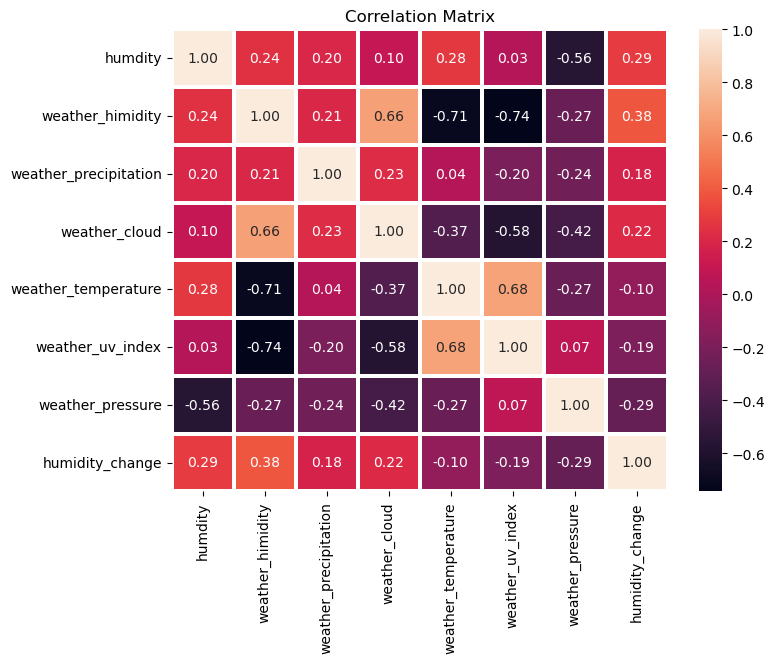

In [399]:
# Calculate the correlation matrix
corr_matrix = hourly.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [401]:
# Print rows where humidity_change is NaN
hourly.loc[hourly['humidity_change'].isna(), 'humidity_change'] = 0

# Machine learning part

Mean Squared Error: 0.0002608047328744567
Root Mean Squared Error: 0.01614944992482582


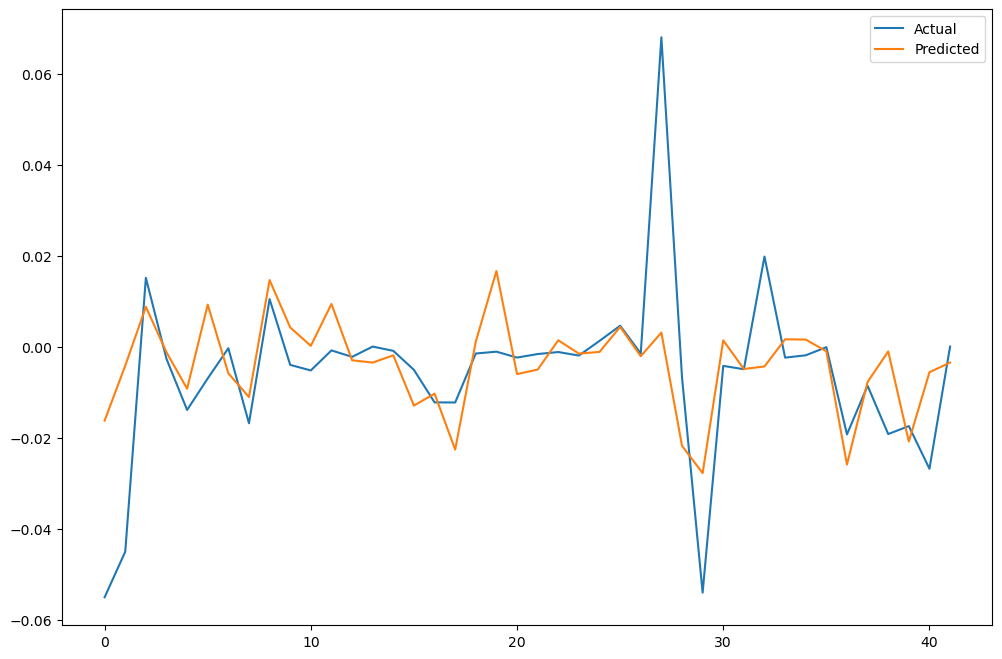

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Assuming your DataFrame is named 'df'
# Extract input features (X) and target variable (y)
X = hourly[['weather_precipitation', 'weather_temperature', 'weather_himidity', 'weather_uv_index']]
y = hourly['humidity_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform any necessary preprocessing steps
# For example, handle missing values or scale numeric features using sklearn's preprocessing functions

# Choose a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
